Шаг 1. Выбор датасета

Был выбран датасет Loan Prediction с  Kagel: https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction

Выбрал несложный датасет, чтобы легче и понятнее было разобраться с данными и увидеть взимосвязь/паттерн.

In [4]:
import kagglehub
import os
import pandas as pd

path = kagglehub.dataset_download("avineshprabhakaran/loan-eligibility-prediction")

csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
df = pd.read_csv(os.path.join(path, csv_files[0]))

df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


Шаг 2. Подготовка

Формулировка задачи: по предыдущим историческим данным (фичам) хочу предсказывать, можно ли человеку выдать кредит или нет (Y/N) - Loan Status это нащ Target.
Тип классификации: бинарная

EDA: размеры, признаки, пропуски, распределение классов, графики.
Обработка данных: импутация, кодирование категорий, масштабирование чисел.

In [ ]:
# Проверим размер и список колонок
print(df.shape)
# Названия колонок
print("Колонки:", sorted(df.columns.tolist())) 
# Типы колонок
print(df.dtypes)

(614, 13)
Колонки: ['Applicant_Income', 'Coapplicant_Income', 'Credit_History', 'Customer_ID', 'Dependents', 'Education', 'Gender', 'Loan_Amount', 'Loan_Amount_Term', 'Loan_Status', 'Married', 'Property_Area', 'Self_Employed']
Customer_ID             int64
Gender                 object
Married                object
Dependents              int64
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount             int64
Loan_Amount_Term        int64
Credit_History          int64
Property_Area          object
Loan_Status            object
dtype: object
Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64


In [14]:
print("Количество пропусков в каждой колонке:\n")
print(df.isna().sum())

# Пропусков нет

Количество пропусков в каждой колонке:

Customer_ID           0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [15]:
numeric_columns = df.select_dtypes(include="number").columns.tolist()
categorical_columns = df.select_dtypes(exclude="number").columns.tolist()

print("\nЧисловые признаки:", numeric_columns)
print("Категориальные признаки:", categorical_columns)

stats_table = (
    df[numeric_columns]
    .describe()
    .T[["mean", "std", "min", "max"]]
    .round(2)
)

stats_table = stats_table.rename(
    columns={
        "mean": "mean (среднее)",
        "std": "std (стандартное отклонение)",
        "min": "min (минимум)",
        "max": "max (максимум)"
    }
)

print("\nОписание числовых признаков:\n")
stats_table


Числовые признаки: ['Customer_ID', 'Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History']
Категориальные признаки: ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

Описание числовых признаков:



,mean (среднее),std (стандартное отклонение),min (минимум),max (максимум)
Customer_ID,307.50,177.39,1.0,614.0
Dependents,0.86,1.22,0.0,4.0
Applicant_Income,5403.46,6109.04,150.0,81000.0
Coapplicant_Income,1621.25,2926.25,0.0,41667.0
Loan_Amount,142.02,87.08,9.0,700.0
Loan_Amount_Term,338.89,69.72,12.0,480.0
Credit_History,0.85,0.36,0.0,1.0


In [16]:
# Удалю Customer_ID, так как он не нужен для обучения
df = df.drop(columns=['Customer_ID'])
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [19]:
print("\nРаспределение классов (Loan Status):\n")
print(df["Loan_Status"].value_counts(normalize=True).round(3))


Распределение классов (Loan Status):

Loan_Status
Y    0.687
N    0.313
Name: proportion, dtype: float64


<Axes: xlabel='Applicant_Income', ylabel='Count'>

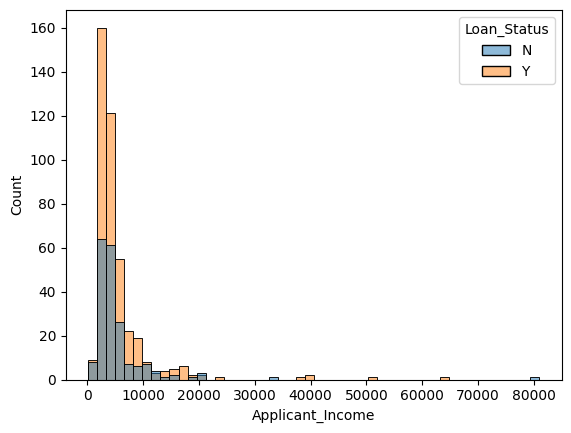

In [ ]:
# Интересно посмотреть на распределение классов в зависимости от дохода
sns.histplot(data=df, x='Applicant_Income', hue='Loan_Status')

# Что иммем:
# - логично, что чем больше доход, тем больше вероятность получить кредит

In [ ]:
target_column = "Loan_Status"
feature_columns = [
    "Gender",
    "Married",
    "Dependents",
    "Education",
    "Self_Employed",
    "Applicant_Income",
    "Coapplicant_Income",
    "Loan_Amount",
    "Loan_Amount_Term",
    "Credit_History"
]

features_numeric_columns = (
    df[feature_columns]
    .select_dtypes(include="number")
    .columns
    .tolist()
)
features_categorical_columns = (
    df[feature_columns]
    .select_dtypes(exclude="number")
    .columns
    .tolist()
)

print("Целевая переменная:", target_column)
print("Признаки:", feature_columns)
print("\nЧисловые признаки:", features_numeric_columns)
print("Категориальные признаки:", features_categorical_columns)

Целевая переменная: Loan_Status
Признаки: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']

Числовые признаки: ['Dependents', 'Applicant_Income', 'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term']
Категориальные признаки: ['Gender', 'Married', 'Education', 'Self_Employed']


In [45]:
features_matrix = df[feature_columns].copy() 
target_vector = df[target_column].copy()

print("\nПроверка X / y:")
print("Форма X:", features_matrix.shape)
print("Форма y:", target_vector.shape)

from sklearn.model_selection import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_matrix,
    target_vector,
    test_size=0.3,         # 30% в тестовую выборку, 70% в обучающую
    stratify=target_vector,
    random_state=42
)

print("\nTrain/Test split выполнен.")
print("X_train:", features_train.shape, " | X_test:", features_test.shape)
print("y_train:", target_train.shape, " | y_test:", target_test.shape)

print("\nБаланс классов в y_train:")
print(target_train.value_counts(normalize=True).round(3))
print("\nБаланс классов в y_test:")
print(target_test.value_counts(normalize=True).round(3))


Проверка X / y:
Форма X: (614, 9)
Форма y: (614,)

Train/Test split выполнен.
X_train: (429, 9)  | X_test: (185, 9)
y_train: (429,)  | y_test: (185,)

Баланс классов в y_train:
Loan_Status
Y    0.688
N    0.312
Name: proportion, dtype: float64

Баланс классов в y_test:
Loan_Status
Y    0.686
N    0.314
Name: proportion, dtype: float64


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("scale_numeric", numeric_transformer, features_numeric_columns),         # имя шага, трансформер, список колонок
        ("onehot_categorical", categorical_transformer, features_categorical_columns),
    ],
    remainder="drop"                                                              # других колонок у нас и не должно быть
)

Шаг 3. Модели

1. LogisticRegression
2. Random Forest
3. kNN

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

classification_model = LogisticRegression(max_iter=1000)

logistic_regression = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", classification_model)
    ]
)

In [48]:
from sklearn.ensemble import RandomForestClassifier

classification_model = RandomForestClassifier(n_estimators=200, random_state=42)

random_forest = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", classification_model)
])

In [49]:
from sklearn.neighbors import KNeighborsClassifier

classification_model = RandomForestClassifier(n_estimators=200, random_state=42)

knn = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", classification_model)
])

In [ ]:

from sklearn.metrics import accuracy_score, f1_score

models = {
    "LogisticRegression": logistic_regression,
    "RandomForest": random_forest,
    "KNN": knn
}

results = {}

for name, model in models.items():
    model.fit(features_train, target_train)
    test_predictions = model.predict(features_test)

    results[name] = {
        "accuracy": round(accuracy_score(target_test, test_predictions), 3),
        "f1_macro": round(f1_score(target_test, test_predictions, average="macro"), 3)
    }

import pprint

pp = pprint.PrettyPrinter(indent=2)
pp.pprint(results)

# Что это значит:
# LogisticRegression - самая точная, она правильно классифицирует 80% заявок, другие 2 модели работают одинаково хуже;
# возможно данные имеют хорошую линейную зависимость;
# хотя возможно если подкрутить параметры леса или kNN - то качество может вырасти

# (спойлер: дальше я просто воткнулся в проблему - что датасет какой-то странный и Credit_History тупо перетяшивает одеяло на себя)

{ 'KNN': {'accuracy': 0.627, 'f1_macro': 0.482},
  'LogisticRegression': {'accuracy': 0.686, 'f1_macro': 0.423},
  'RandomForest': {'accuracy': 0.627, 'f1_macro': 0.482}}


In [ ]:
# classification report
from sklearn.metrics import classification_report

# Получим classification report для каждой модели
for name, model in models.items():
    test_preds = model.predict(features_test)
    print(f"\nClassification Report for {name}:")
    print(classification_report(target_test, test_preds, digits=3))

# тут вроде тоже LogisticRegression тоже наиболее точная, precision 80% для Y и N
# хотя


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           N      0.500     0.017     0.033        58
           Y      0.689     0.992     0.813       127

    accuracy                          0.686       185
   macro avg      0.594     0.505     0.423       185
weighted avg      0.629     0.686     0.568       185


Classification Report for RandomForest:
              precision    recall  f1-score   support

           N      0.310     0.155     0.207        58
           Y      0.686     0.843     0.756       127

    accuracy                          0.627       185
   macro avg      0.498     0.499     0.482       185
weighted avg      0.568     0.627     0.584       185


Classification Report for KNN:
              precision    recall  f1-score   support

           N      0.310     0.155     0.207        58
           Y      0.686     0.843     0.756       127

    accuracy                          0.627       185
   macro

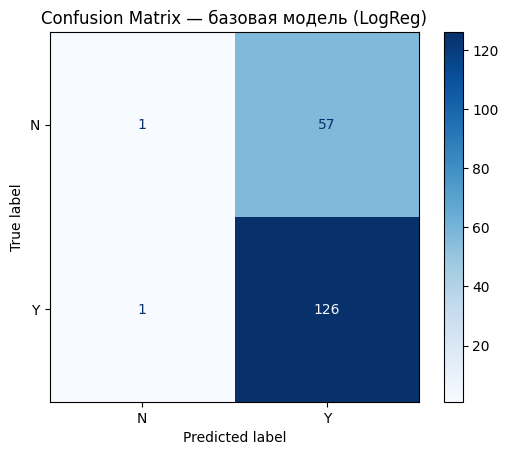

In [ ]:
# confusion matrix for LogisticRegression model (дальше буду использовать логистическую регрессию как базовую модель)
from sklearn.metrics import ConfusionMatrixDisplay

logistic_regression.fit(features_train, target_train)
test_predictions = logistic_regression.predict(features_test)

ConfusionMatrixDisplay.from_predictions(target_test, test_predictions, cmap="Blues")
plt.title("Confusion Matrix — базовая модель (LogReg)")
plt.show()
